<a href="https://colab.research.google.com/github/SIDIBEMoussa/Banking-credit-aproval-predicting/blob/main/Banking_credit_aproval_predicting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
data=pd.read_excel("Data.xlsx")

In [3]:
data=data.drop(['Unnamed: 0',"ID","Approuvée"],axis=1)
data=data.dropna()

In [4]:
data.head(2)

,Sexe,Motorisé,PropriétaireImmobilier,NombreEnfants,RevenuAnnuel,SecteurActivité,NiveauEducation,EtatCivil,TypeLogement,CategorieEmploi,MembreFamille,Age,Experience,target
0,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,Security staff,2,58,3,0
1,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,1,52,8,0


In [5]:
import seaborn as sns
import matplotlib.pyplot as pl
import numpy as np

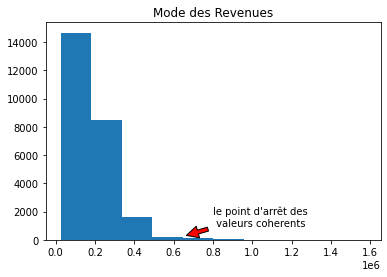

In [6]:
p=pl.hist(data.RevenuAnnuel)
a=pl.annotate("le point d'arrêt des \n valeurs coherents",xy=(0.65*10**6,250),xytext=(800000,1000),arrowprops = {'facecolor': 'red','shrink': 0.1})
m=pl.title("Mode des Revenues")

Avec ce histogramme nous pouvons facilement detecter les outliers afin de les enlever sinon plus influent sur les valeurs de tendance centrale et de dispersion

In [7]:
data=data[data.RevenuAnnuel<350000]

## Analyse univariée

1. Mesures de tendances centrales  et mesures de dispersion
2. Visualisation graphiques des données

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


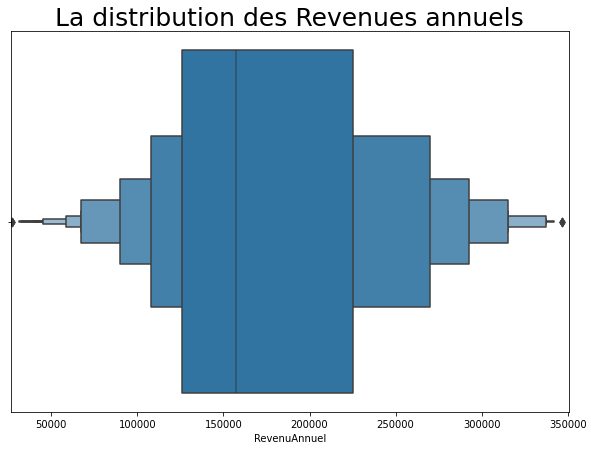

In [8]:
pl.figure(figsize=(10,7))
sns.boxenplot("RevenuAnnuel",data=data,width=0.9).set_title("La distribution des Revenues annuels",size=25)
pl.axis(xmin=26500,xmax=350500)

pl.show()

Avec ce graphique ci-dessus nous avons une idée globale ci sur la distribution des salaires annuels des clients dont la moyenne est environ 180000

In [9]:
round((data.RevenuAnnuel).std())

65579

# La dispersion autour de la tendance central est std: 65579

# La dispersion du salaire annuel

Alors nous avions une très grande variabilité entre les salaires annuels de nos clients avec plus ou moins des valeurs qui peuvent tourner autour de la moyenne avec une de 65579 ce qui enorme au point de vue salariale alors nous observons une difference de classe sociale entre les clients voulant contracter le crédit

In [10]:
data.RevenuAnnuel.skew(),data.RevenuAnnuel.kurtosis()

(0.4637152516442095, -0.4807490784268902)

# La forme du Revenu annuel des clients
* La plupart de nos clients ont un salaire plus étalé à droite de la moyenne ce qui resulte de la positivité de skewness empirique
* Notre variable a des observations moins concentrées: la distribution est plus applatis que la distibution normale

# Nous allons nous intérêsser dans cette partie à l'âge de nos candidats pour un crédit bancaire

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


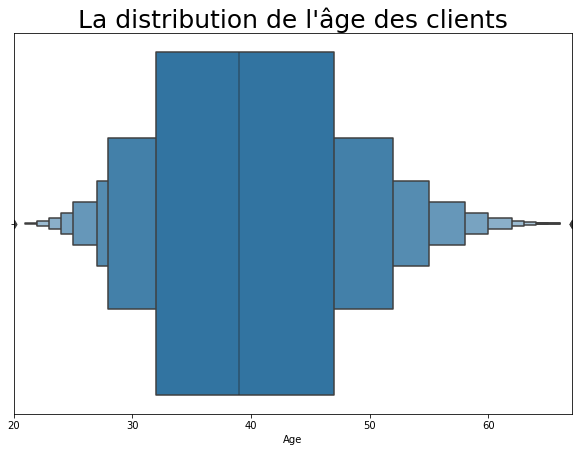

In [11]:
pl.figure(figsize=(10,7))
sns.boxenplot("Age",data=data,width=0.9).set_title("La distribution de l'âge des clients",size=25)
pl.axis(xmin=20,xmax=67)
pl.show()

## Nous avions une clientèle plus concentré dans le tranche d'âge [37 ans - 57 ans] 

In [12]:
round(data.Age.std())

10

## La dispersion de l'âge autour de la tendance central est std: 10

In [13]:
data.Age.skew(),data.Age.kurtosis()

(0.28735032524142645, -0.741356087952862)

# La forme de l'âge des clients
* La plupart de nos clients ont un âge plus étalé à droite  de la  moyenne ce qui resulte de la positivité de skewness empirique
* Notre variable a des observations moins concentrées: la distribution est plus applatis que la distibution normale

In [14]:
data.head(2)

,Sexe,Motorisé,PropriétaireImmobilier,NombreEnfants,RevenuAnnuel,SecteurActivité,NiveauEducation,EtatCivil,TypeLogement,CategorieEmploi,MembreFamille,Age,Experience,target
0,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,Security staff,2,58,3,0
1,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,1,52,8,0


([0, 1, 2, 3, 4], <a list of 5 Text major ticklabel objects>)

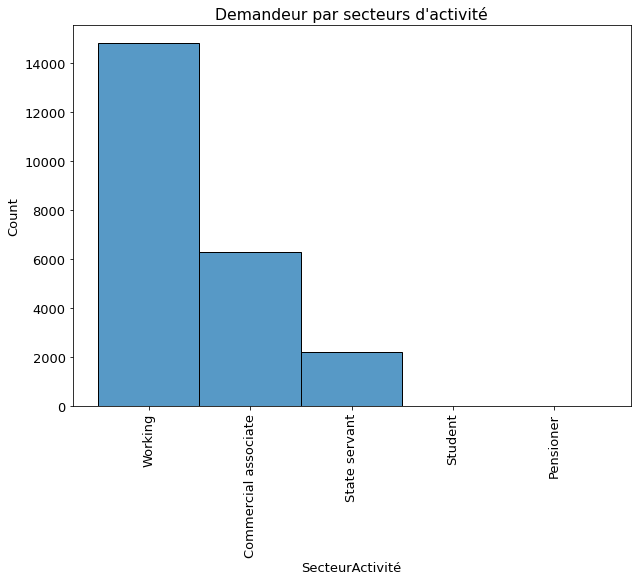

In [15]:
pl.figure(figsize=(10,7))
pl.rcParams.update({"font.size":13})
sns.histplot(data=data.SecteurActivité).set_title("Demandeur par secteurs d'activité")
pl.xticks(rotation=90)

Alors nous les demandeurs de crédits sont en une écrasante majorité des travailleurs, il s'en suit des associer commerciaux et puis les agents d'Etat. Les étudiants et les pensionneurs sont minimes vu leurs chances d'obtention tout autant faible.

([0, 1, 2, 3, 4], <a list of 5 Text major ticklabel objects>)

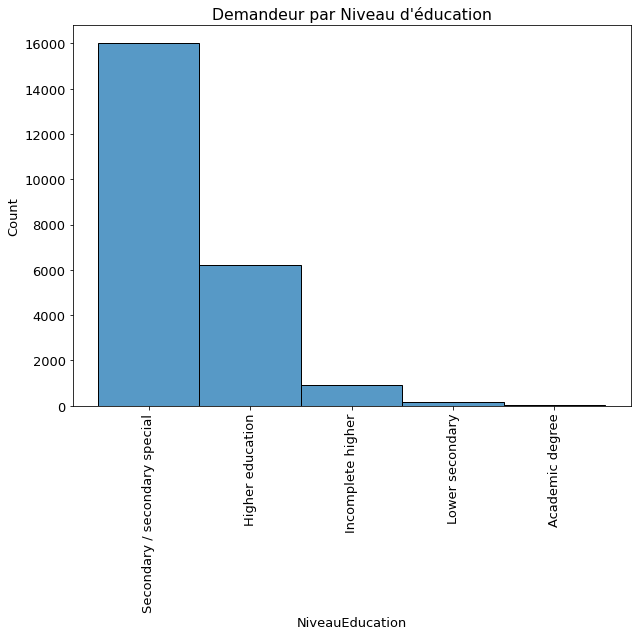

In [16]:
pl.figure(figsize=(10,7))
pl.rcParams.update({"font.size":13})
sns.histplot(data=data.NiveauEducation).set_title("Demandeur par Niveau d'éducation")
pl.xticks(rotation=90)

Parmis les clients nous avons une large majorité ayant un niveau d'étude de secondaire ou un diplôme professionnelle. Après, ceux ayant obtenu leurs diplômes d'études supérieures et ensuite ayant fait un arrêt en chémin. Enfin les candidats diminue plus le niveau d'éducation baisse.

Text(0.5, 1.0, "Demandeur par statut d'automobile")

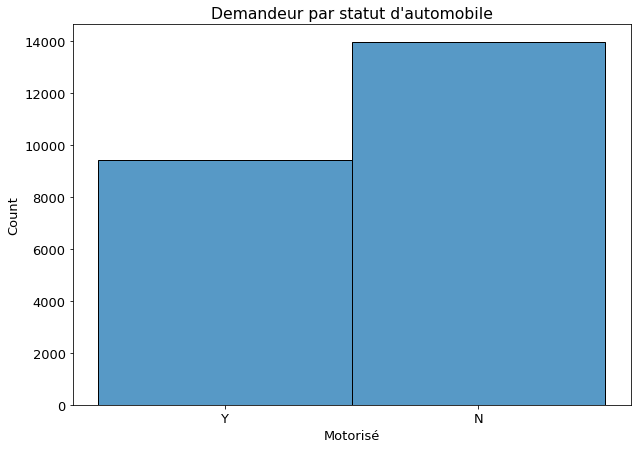

In [17]:
pl.figure(figsize=(10,7))
pl.rcParams.update({"font.size":13})
sns.histplot(data=data.Motorisé).set_title("Demandeur par statut d'automobile")

Nous assez de personnes n'ayant pas de un engin motorisé

([0, 1], <a list of 2 Text major ticklabel objects>)

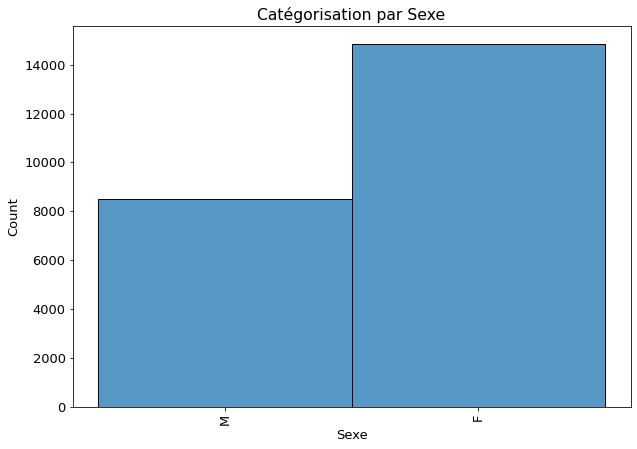

In [18]:
pl.figure(figsize=(10,7))
pl.rcParams.update({"font.size":13})
sns.histplot(data=data.Sexe).set_title("Catégorisation par Sexe")
pl.xticks(rotation=90)

Les femmes représentent presque le double des hommes demandant un crédit bancaire

Text(0.5, 1.0, 'Demandeurs ayant un bien immobilier')

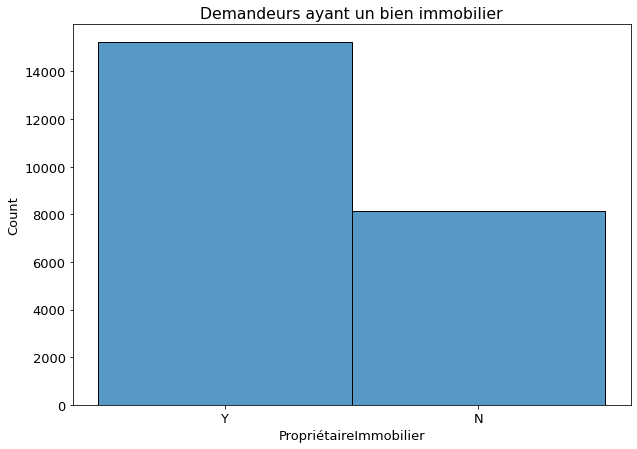

In [19]:
pl.figure(figsize=(10,7))
pl.rcParams.update({"font.size":13})
sns.histplot(data=data.PropriétaireImmobilier).set_title("Demandeurs ayant un bien immobilier")

([0, 1, 2, 3, 4], <a list of 5 Text major ticklabel objects>)

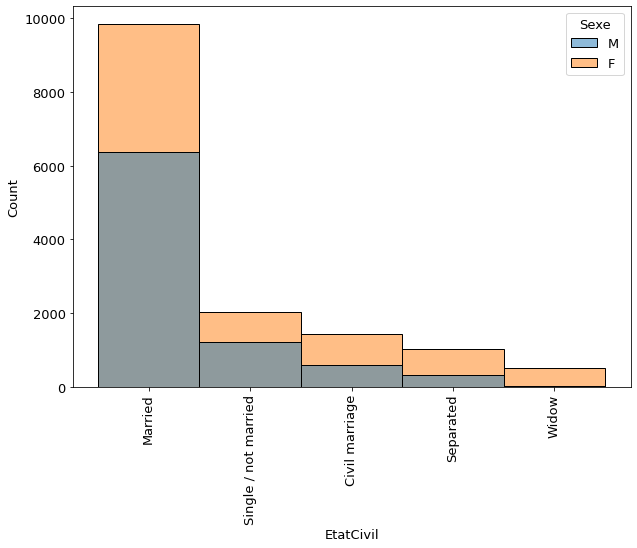

In [20]:
pl.figure(figsize=(10,7))
pl.rcParams.update({"font.size":13})
sns.histplot(x="EtatCivil",hue="Sexe",data=data)
pl.xticks(rotation=90)

Tout aussi logique les marriés sont nombreux à vouloir contracter un crédit car très souvent des visions communes ou des achats des bien immobiliers nécéssitant un engagement auprès des sociètés de crédits, ensuite les célibataires et des gens ayant un engagement civil les conférants quelques droits et dévoirs du mariage

(-0.3, 4.0, 0.5, -0.5)

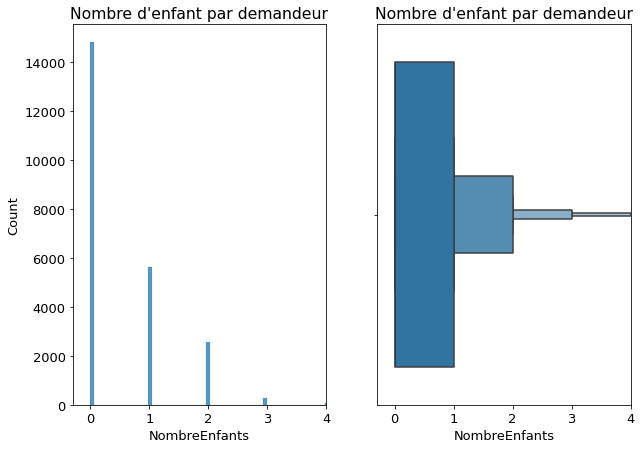

In [21]:
pl.figure(figsize=(10,7))
pl.rcParams.update({"font.size":13})
pl.subplot(121)
sns.histplot(data=data,x="NombreEnfants").set_title("Nombre d'enfant par demandeur")
pl.axis(xmin=-0.3,xmax=4)
pl.subplot(122)
sns.boxenplot(data=data,x="NombreEnfants").set_title("Nombre d'enfant par demandeur")
pl.axis(xmin=-0.3,xmax=4)

La majorité des candidats non pas d'enfant et ensuite la population diminue plus le nombre d'enfant augmente.

([0, 1, 2, 3, 4, 5], <a list of 6 Text major ticklabel objects>)

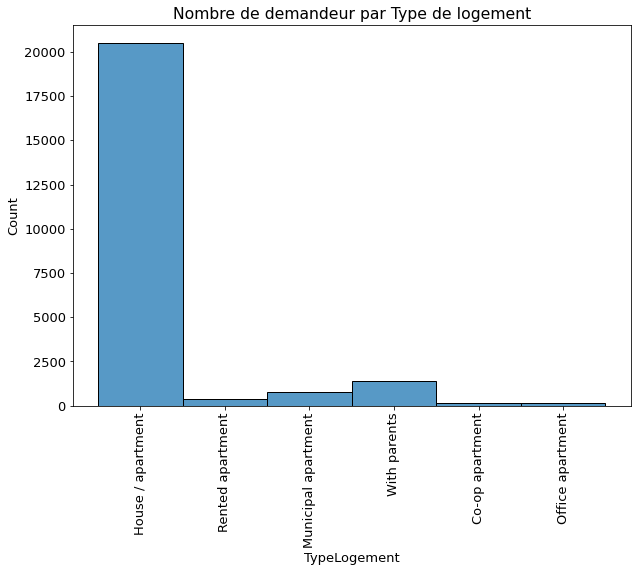

In [22]:
pl.figure(figsize=(10,7))
pl.rcParams.update({"font.size":13})
sns.histplot(data=data.TypeLogement).set_title("Nombre de demandeur par Type de logement")
pl.xticks(rotation=90)

La plupart des personnes ont habite dans une maison, ensuite on a ceux qui vivent dans l'appartement familliale

([0, 1, 2], <a list of 3 Text major ticklabel objects>)

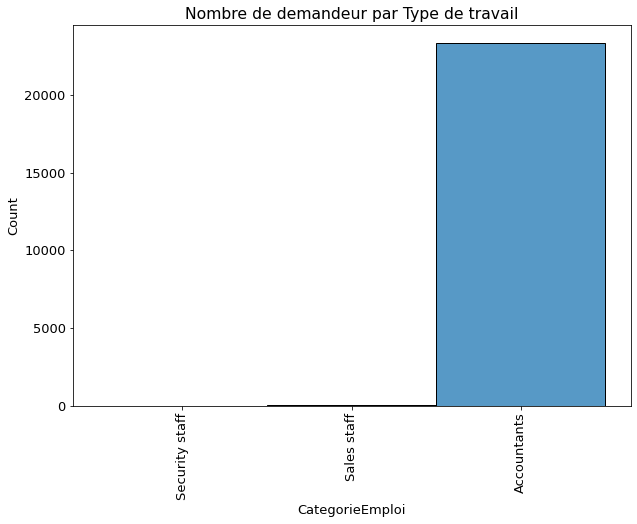

In [23]:
pl.figure(figsize=(10,7))
pl.rcParams.update({"font.size":13})
sns.histplot(data=data.CategorieEmploi).set_title("Nombre de demandeur par Type de travail")
pl.xticks(rotation=90)

Les comptables sont surrepresentés, ils sont quasiment tous des comptables.

(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.]),
 <a list of 7 Text major ticklabel objects>)

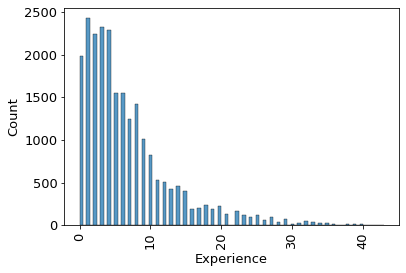

In [24]:
sns.histplot(data=data.Experience)
pl.xticks(rotation=90)

Nous observons des candidats majoritairement en debut carrière proféssionnelle tandis que les véterans très peu à vouloir contracter une dette

# Analyse multivariée

In [25]:
sizes=[len(data[data.target==0]),len(data[data.target==1])]
labels=["Refusées","Accordées"]
explode=(0.5,0)

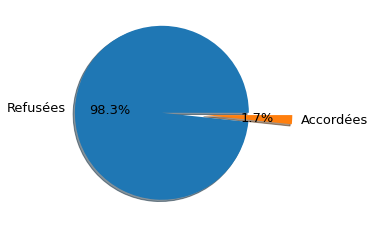

In [26]:
p=pl.pie(sizes,explode,labels,autopct='%1.1f%%',shadow=True)

data.pivot_table("Motorisé",index="target",columns="Sexe",aggfunc="sum")

In [27]:
from sklearn.model_selection import train_test_split as tts

In [28]:
data.columns

Index(['Sexe', 'Motorisé', 'PropriétaireImmobilier', 'NombreEnfants',
       'RevenuAnnuel', 'SecteurActivité', 'NiveauEducation', 'EtatCivil',
       'TypeLogement', 'CategorieEmploi', 'MembreFamille', 'Age', 'Experience',
       'target'],
      dtype='object')

In [29]:
data.head()

,Sexe,Motorisé,PropriétaireImmobilier,NombreEnfants,RevenuAnnuel,SecteurActivité,NiveauEducation,EtatCivil,TypeLogement,CategorieEmploi,MembreFamille,Age,Experience,target
0,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,Security staff,2,58,3,0
1,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,1,52,8,0
2,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,1,52,8,0
3,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,1,52,8,0
4,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,1,52,8,0


In [30]:
cat_cols=['Sexe','Motorisé','PropriétaireImmobilier','SecteurActivité','NiveauEducation','EtatCivil','TypeLogement','CategorieEmploi']
num_cols=['NombreEnfants','RevenuAnnuel','MembreFamille','Age','Experience','target']

In [31]:
data[cat_cols]=data[cat_cols].astype("category")

In [32]:
data=pd.get_dummies(data=data, columns=cat_cols)

In [35]:
data.head()

,NombreEnfants,RevenuAnnuel,MembreFamille,Age,Experience,target,Sexe_F,Sexe_M,Motorisé_N,Motorisé_Y,PropriétaireImmobilier_N,PropriétaireImmobilier_Y,SecteurActivité_Commercial associate,SecteurActivité_Pensioner,SecteurActivité_State servant,SecteurActivité_Student,SecteurActivité_Working,NiveauEducation_Academic degree,NiveauEducation_Higher education,NiveauEducation_Incomplete higher,NiveauEducation_Lower secondary,NiveauEducation_Secondary / secondary special,EtatCivil_Civil marriage,EtatCivil_Married,EtatCivil_Separated,EtatCivil_Single / not married,EtatCivil_Widow,TypeLogement_Co-op apartment,TypeLogement_House / apartment,TypeLogement_Municipal apartment,TypeLogement_Office apartment,TypeLogement_Rented apartment,TypeLogement_With parents,CategorieEmploi_Accountants,CategorieEmploi_Sales staff,CategorieEmploi_Security staff
0,0,112500.0,2,58,3,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1
1,0,270000.0,1,52,8,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0
2,0,270000.0,1,52,8,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0
3,0,270000.0,1,52,8,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0
4,0,270000.0,1,52,8,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0


In [39]:
X=data[data.columns.difference(["target"])]
Y=data.target

In [41]:
x_train,x_test,y_train,y_test=tts(X,Y,train_size=0.7)

In [49]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier


Classifiers=[KNeighborsClassifier,SVC,LogisticRegression,RandomForestClassifier,RandomForestClassifier,MLPClassifier,MLPClassifier,
             LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis,XGBClassifier]

In [50]:
import pandas as pd

col=["Name","Accuracy"]
df=pd.DataFrame(columns=col)
for classifier in Classifiers:
    Name=classifier.__name__
    model=classifier().fit(x_train,y_train)
    y_pred=model.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    print("***Result***")
    print("="*40)
    print("{} \n Accuracy:{:.4%}".format(Name,acc))
    print("="*40)
    df1=pd.DataFrame([[Name,acc]],columns=col)
    df=df.append(df1)

***Result***
KNeighborsClassifier 
 Accuracy:98.0585%
***Result***
SVC 
 Accuracy:98.2727%
***Result***
LogisticRegression 
 Accuracy:98.2727%
***Result***
RandomForestClassifier 
 Accuracy:97.9729%
***Result***
RandomForestClassifier 
 Accuracy:98.0585%


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


***Result***
MLPClassifier 
 Accuracy:98.2727%


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


***Result***
MLPClassifier 
 Accuracy:98.2727%
***Result***
LinearDiscriminantAnalysis 
 Accuracy:98.3298%


/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


***Result***
QuadraticDiscriminantAnalysis 
 Accuracy:8.4368%
***Result***
XGBClassifier 
 Accuracy:98.3298%


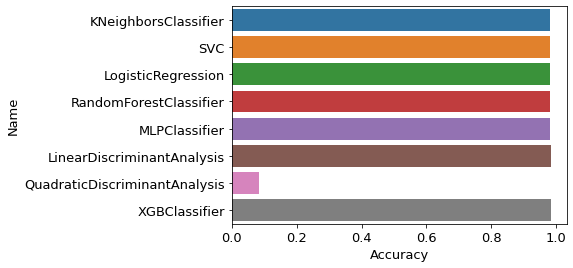

In [51]:
import seaborn as sns

sns.barplot(x="Accuracy",y="Name",data=df)
pl.show()